# LAB 3

We are going to move from a $1D$ problem to a $2D$ one, still using a FINITE EEMENT method.


In [ ]:
# Installation of firedrake
try:
  import firedrake
except ImportError:
  !wget "https://fem-on-colab.github.io/releases/firedrake-install-real.sh" -O "/tmp/firedrake-install.sh" && bash "/tmp/firedrake-install.sh"
  import firedrak

In [ ]:
# Import libraries
from firedrake import *
import numpy as np
import matplotlib.pyplot as plt
import firedrake.pyplot as fdplt

## EXERCISE 1:

Write the weak formulation of the following Poisson problem with mixed boundary conditions on the unit square domani $\Omega = (0,1)^2$: \\

\begin{align}
    \begin{cases}
       - ∇\cdotp (K∇u) = f \quad \quad \quad \quad \quad \quad \quad ~~~ in~Ω \\
        u = g_D \quad \quad \quad ~~ \quad \quad \quad \quad \quad \quad \quad \quad on~Γ_D\\
        -K ∇u· n = g_N \quad \quad \quad \quad \quad on~\Gamma_N \\
        -K ∇u·n = α(u-u_R) \quad \quad on~\Gamma_R \\
    \end{cases}
\end{align}

Where $K\in \mathbb{R}^{2×2}$. \\


Note: \\
$\Omega = (0,1)^2$ means you are working in a 2D domain where both x and y domain goes from $(0, 1)$. \\


Teoretical question (answered in the notes)

### Solution:

For the *Weak formulation* we multiply the equation by a test
function $v$ and we integrate over the domain $\Omega$ to obtain:
\begin{equation*}
  -\int_\Omega \nabla\cdot{( K \boldsymbol{\nabla}u)} v \,
  \mathrm{d\Omega} = \int_\Omega f v \, \mathrm{d\Omega},
\end{equation*}

\\

→ integrating by parts: \\

\\

\begin{equation*}
  ⇒\int_{\partial\Omega} (-K \boldsymbol{\nabla} u\cdot{\boldsymbol{n}}) v \, \mathrm{d\Gamma} +
  \int_\Omega K\boldsymbol{\nabla} u\cdot \boldsymbol{\nabla} v \, \mathrm{d\Omega} =
  \int_\Omega f v \, \mathrm{d\Omega}.
\end{equation*}

\\

The **integral over the boundary $\partial\Omega$ is split into three contributions**: \\

\\

\begin{equation*}
  \int_{\partial\Omega} (-K \boldsymbol{\nabla} u\cdot{\boldsymbol{n}}) v \, \mathrm{d\Gamma} =
  \int_{\Gamma_D} (-K \boldsymbol{\nabla} u\cdot{\boldsymbol{n}}) v \, \mathrm{d\Gamma} +
  \int_{\Gamma_N} (-K \boldsymbol{\nabla} u\cdot{\boldsymbol{n}}) v \, \mathrm{d\Gamma} +
  \int_{\Gamma_R} (-K \boldsymbol{\nabla} u\cdot{\boldsymbol{n}}) v \, \mathrm{d\Gamma}.
\end{equation*} \\

\\


*    On the **Dirichlet boundary** $\Gamma_D$ we assume that the test function $v$ is equal to $0$, since the value of $u$ is fixed (essential BC).

*    On the **Neumann boundary** $\Gamma_N$ the value of the heat flux is known (natural BC):
\begin{equation*}
  \int_{\Gamma_N} (-K \boldsymbol{\nabla} u\cdot{\boldsymbol{n}}) v \, \mathrm{d\Gamma} =
    \int_{\Gamma_N} g_N v \, \mathrm{d\Gamma}.
\end{equation*}

*    On the **Robin boundary** $\Gamma_R$ the condition is enforced as in the Neumann case (natural BC)
\begin{equation*}
  \int_{\Gamma_R} (-K \boldsymbol{\nabla} u\cdot{\boldsymbol{n}}) v \, \mathrm{d\Gamma} =
    \int_{\Gamma_R} \alpha (u - u_R) v \, \mathrm{d\Gamma}.
\end{equation*}

\\

Then, we reorder the terms to leave the functions depending on $u$ on the left-hand side and the functions depending on the problem data on the right-hand side. Proceeding in this way, we obtain: \\

\\

\begin{equation*}
  ⇒\int_\Omega  K\boldsymbol{\nabla} u\cdot \boldsymbol{\nabla} v \, \mathrm{d\Omega}
  + \int_{\Gamma_R} \alpha u v \, \mathrm{d\Gamma} =
  \int_\Omega f v \, \mathrm{d\Omega}
  - \int_{\Gamma_N} g_N v \, \mathrm{d\Gamma}
  + \int_{\Gamma_R} \alpha u_R v \, \mathrm{d\Gamma}
\end{equation*}

\\

Therefore the **weak formulation** reads:

$$
\text{Find } u\in H^1(\Omega) \;\text{ satisfying the essential b.c.s and such that } \; a(u, v) = L(v) \quad \forall v\in H^1_{0,\Gamma_D}(\Omega),
$$
where the **bilinear form** is defined by
\begin{equation*}
  a(u, v) = \int_\Omega K\boldsymbol{\nabla} u\cdot \boldsymbol{\nabla} v \, \mathrm{d\Omega}
          + \int_{\Gamma_R} \alpha u v \, \mathrm{d\Gamma},
\end{equation*}
and the **linear functional** is defined such that
\begin{equation*}
  L(v) = \int_\Omega f v \, \mathrm{d\Omega}
       - \int_{\Gamma_N} g_N v \, \mathrm{d\Gamma}
       + \int_{\Gamma_R} \alpha u_R v \, \mathrm{d\Gamma}.
\end{equation*}

\\

Notice that if coefficient $\alpha$ is positive, bilinear form $a(u, v)$ is guaranteed to be coercive. $\alpha$ can be interpreted physically as a convective heat transfer coefficient, which is indeed positive.

## EXERCISE 2:

Consider the problem above with data: \\
\begin{equation*}
  K = I, \quad
  \alpha = 1, \quad
  f = 0, \quad
  g_D = 0, \quad
  g_N = -1, \quad
  u_R = 1.
\end{equation*}

And boundaries: \\
\begin{align*}
\Gamma_D
      &= \{(x,y) \in \mathbb{R}^2 \,|\, x \in \{0, 1\} \text{ and } y \in (0, 1) \} \\
\Gamma_N
      &= \{(x,y) \in \mathbb{R}^2 \,|\, x \in (0, 1) \text{ and } y = 0 \} \\
\Gamma_R
      &= \{(x,y) \in \mathbb{R}^2 \,|\, x \in (0, 1) \text{ and } y = 1 \} \\
\end{align*}

\\

(a) Solve the problem using Firedrake and $P^1$ elements. \\
(b) Change the linear solver to conjugate gradient (CG) with a geometric algebraic multigrid preconditioner (GAMG) (see https://www.firedrakeproject.org/solving-interface. html#linear-solver-options for the implementation). Assess the performance improvement in terms of time and number of iterations, with respect to using CG without preconditioner and to using the default Firedrake settings (GMRES + ILU preconditioning: see
https://www.firedrakeproject.org/solving-interface.html#default-solver-options).



### (a) Solve the problem using Firedrake and $P^1$ elements.

In [ ]:
# Initialize problem data
alpha = Constant(1.)
f = Constant(0.)
gD = Constant(0.)
gN = Constant(-1.) # Generic Neuman B.C.
uR = Constant(1.)


# Number of division
n = 20


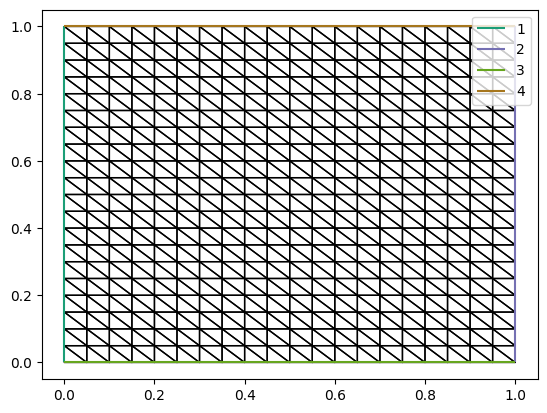

In [ ]:
# Define the mesh
mesh = UnitSquareMesh(n, n) # Here we don't need to specify the interval
                            # extrema becaus there is a comand on Firedrake that
                            # makes automatically the mesh by itself between (0, 1)^2

# It is interesting to plot the mesh of our 2D problem:
fig, ax = plt.subplots()
q = fdplt.triplot(mesh, axes=ax)
ax.legend()

We note that once you define a mesh you have that the boundary are denominated with the numbers 1, 2, 3, 4 (this is a default denomination in firedrake)

In [ ]:
# Define the function space
V = FunctionSpace(mesh, 'P', 1) # P^1 elements


# Define trial and test functions as belonging to the space
u = TrialFunction(V) # Trial function
v = TestFunction(V) # Test function


# Enforce homogeneous Diriclet B.C. on the boundary named 1 and 2
bc = DirichletBC(V, gD, (1, 2))


# Define the variational problem:
a = dot(grad(u), grad(v))*dx + alpha*u*v*ds(4) # Bilinear form
                                               # Integration in all the domain
                                               # (even if is more than 1D)
L = f*v*dx - gN*v*ds(3) + alpha*uR*v*ds(4) # Linear function


# Get the approximate solution
u_h = Function(V)
solve(a==L, u_h, bcs=bc) # we only need to impose Diriclet B.C.


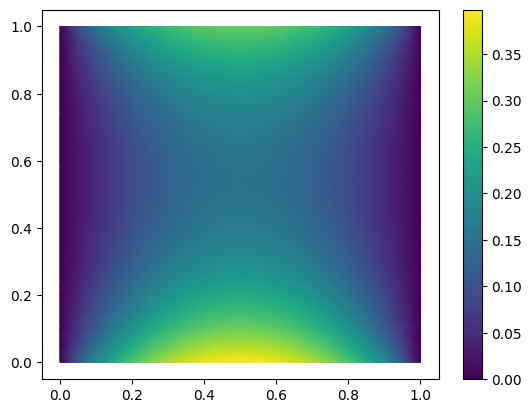

In [ ]:
# Plot the solution
fig, ax = plt.subplots()
q = fdplt.tripcolor(u_h, axes=ax)
plt.colorbar(q)

Note: \\
By increasing alpha you get higer solution at the top of your domain for the Robbin's condition.

### (b) Change the linear solver to conjugate gradient (CG) with a geometric algebraic multigrid preconditioner (GAMG). Assess the performance improvement in terms of time and number of iterations, with respect to using CG without preconditioner and to using the default Firedrake settings (GMRES + ILU preconditioning).

To change the linear solver to conjugate gradient (CG) with geometric algebraic multigrid (GAMG) preconditioner we can change the default settings by passing additional parameters to `solve`. \\

\\

We also want to get the performances interms of time and number of iterations between this method and the classical one that is by default on Firedrake, that is GMRES with an incomplete LU decomposition (ILU) preconditioner (see https://firedrakeproject.org/solving-interface.html#default-solver-options). \\

In this way we're going to see how to use an **iterative solver** instead of the built-in direct solver provided by `solve(a == L, u, bc)`.


In [ ]:
# Import the tool to compute the iteration time from a library:
from time import perf_counter

In [ ]:
# Define the function to solve the 2D problem
def solver_2D(N, parameters):

  # Define the mesh
  mesh = UnitSquareMesh(N, N, diagonal='left')

  # Define function spaces
  V = FunctionSpace(mesh, 'P', 1)

  # Define BCs:
  gD = Constant(0.0) # Essential boundary condition
  bc = DirichletBC(V, gD, (1, 2)) # Natural boundary condition


  # Initialize trial and test function:
  u = TrialFunction(V)
  v = TestFunction(V)


  # Weak formulation:
  a = k * dot(grad(u), grad(v)) * dx  +  alpha * u * v * ds(4) # Bilinear form
  L = f * v * dx  - gN * v * ds(3)  +  alpha * uR * v * ds(4) #Linear function


  # Solve the problem using an iterative method
  t0 = perf_counter() # Set the initial time

  u_h = Function(V) # Initialize u_h belonging to V space
  vpb = LinearVariationalProblem(a, L, u_h, bc) # Set the problem a == L, + BC
  solver =  LinearVariationalSolver(vpb, solver_parameters=parameters) # Set the solver as you want
  solver.solve() # Solve the problem with the settings chosen

  elapsed_time = perf_counter() - t0 # Get the time passed
  iters = solver.snes.ksp.getIterationNumber() # Get the number of iterations

  return u_h, elapsed_time, iters


In [ ]:
# Set data of the problem
k = Constant(1.)
alpha = Constant(1.)
f = Constant(0.)
gN = Constant(-1.)
uR = Constant(1.)


# Compare the performances in terms of iterations and time:
   # Iterative methods: 'cg' or the default 'gmres'
   # By using no preconditioner ('none'), ('gamg') or the default ('iul')
N = 200
#parameters = {'ksp_type': 'gmres', 'pc_type': 'ilu'} # Default setting (GMRES+ILU)
#parameters = {'ksp_type': 'cg', 'pc_type': 'none'} # CG + no preconditioner
parameters = {'ksp_type': 'cg', 'pc_type': 'gamg'} # CG + GAMG


# Recall the function to solve the problem:
u_h, t_default, iters = solver_2D(N, parameters)


In [ ]:
# Print time needed and iterations number:
print('time = ', t_default)
print('number of iterations = ', iters)

time =  0.28539981999983866
number of iterations =  12


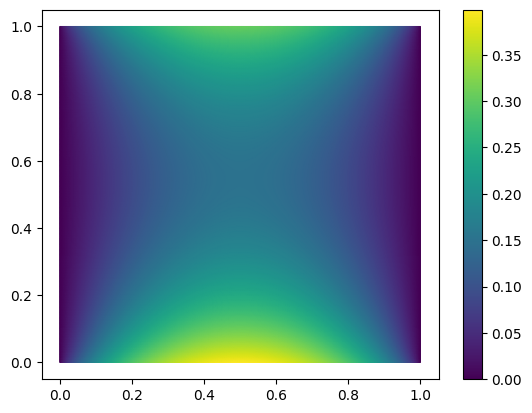

In [ ]:
# Plot results:
fig, ax = plt.subplots()
q = fdplt.tripcolor(u_h, axes=ax)
plt.colorbar(q)

Analyzing the results you get: \\

*   Default settings ( GMRES with precondition ILU) --> time = 0.335s and  N$^\circ$ of iterations = 237
*   Changing the iterative method ( CG with NO precondition) --> time = 0.224s and N$^\circ$ of iterations = 586
*   Changing the iterative method ( CG with precondition GAMG) --> time = 0.167s and N$^\circ$ of iterations = 12

**Some background about preconditioners**

Problem: we have
\begin{equation*}
\mathcal{K}_2(A) \sim h^{-2}.
\end{equation*}
This means that solutions can become inaccurate (because of error amplification), and iterative solvers can become slow, for increasing number of mesh elements. We can think of a matrix $P$ to use as a preconditioner for the system:
\begin{equation*}
P^{-1} A \mathbf{x} = P^{-1} \mathbf{b}.
\end{equation*}
Matrix $P$ should be a good approximation of $A$, and a fast solver for $P$ has to be available. The first requirement will reduce the number of iterations, while the second will keep the cost of each iteration acceptable.

For clarity, consider a generic Richardson method: at step $(k+1)$,
\begin{align*}
&\mathbf{r}^{(k)} = \mathbf{b} - A\mathbf{x}^{(k)} \\
&\mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} + \alpha \mathbf{r}^{(k)}
\end{align*}
The most expensive operation is matrix-vector multiplication.


Preconditioned Richardson method:
at step $(k+1)$,
\begin{align*}
&\mathbf{r}^{(k)} = \mathbf{b} - A\mathbf{x}^{(k)} \\
&\text{solve } P\mathbf{z}^{(k)} = \mathbf{r}^{(k)} \\
&\mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} + \alpha \mathbf{z}^{(k)}
\end{align*}

Here, if the second line is not fast enough, we lose the advantage of preconditioning!

A possible choice for this problem is multigrid (MG): project on a coarser mesh, solve, project back. Alternative: algebraic multi-grid (AMG).



In our case, preconditioning becomes effective in terms of time when $N\gtrapprox 100$.

## EXERCISE 3:

Consider homogeneous Dirichlet boundary conditions: \\

\\

\begin{equation*}
\Gamma_D = \partial \Omega, \quad g_d=0
\end{equation*} \\

\\

Where the forcing term is $f = 2\pi^2 \sin(\pi x) \sin(\pi y)$, and $K = I$ so that the exact solution is: \\

\\

\begin{equation*}
u = \sin(\pi x) \sin(\pi y).
\end{equation*} \\

\\

Solve the problem with Firedrake and compute the solution. Then verify the convergence properties of the method with respect to norms $L^2$ and $H^1$ for $\mathbb{P}^k$ elements, $k=1, 2$.

### Solve the problem with Firedrake and compute the solution.

In [ ]:
def solve_prob_3(k):
  # Define discrete function spaces:
  V = FunctionSpace(mesh, 'P', k) # Again we use P^1 elemenents

  # Boundary conditions:
  bc = DirichletBC(V, g_d, 'on_boundary') # Here is DC in all the boundary

  # Define the trial and test functions:
  u = TrialFunction(V)
  v = TestFunction(V)

  # Define the variational problem:
  a = dot(grad(u), grad(v)) * dx # Bilinear form
  L = f(x, y) * v * dx # Linerar function

  # Get the discrete solution:
  u_h = Function(V) # Initialize the solution telling that the solution belongs to V space
  solve(a==L, u_h, bcs=bc)


  # Get the errors on H1 and L2:
  err_H1 = errornorm(u_ex(x, y), u_h, 'H1')
  err_L2 = errornorm(u_ex(x, y), u_h, 'L2')

  return u_h, err_H1, err_L2


In [ ]:
# Number of intervals for discretization:
n = 20

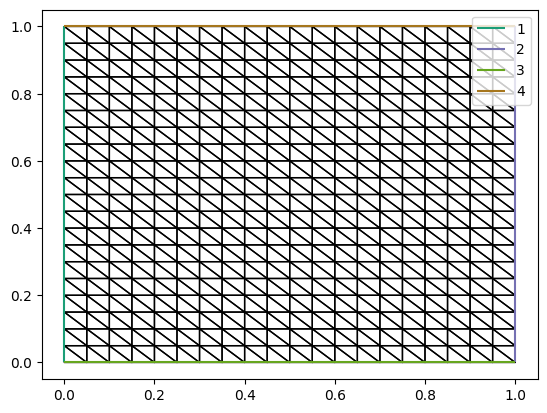

In [ ]:
# Define the mesh:
mesh = UnitSquareMesh(n, n)
x, y = SpatialCoordinate(mesh) # Give a name to the coordinates of the mesh:

# Let's plot the mesh:
fig, ax=plt.subplots()
fdplt.triplot(mesh, axes=ax)
ax.legend()

In [ ]:
# Define the function of the problem and its B.C.:
f = lambda x, y: 2*np.pi**2*sin(np.pi*x)*sin(np.pi*y) # Function
g_d = Constant(0.) # Dirichlet B.C.

In [ ]:
# Get the solution:
u_h, err_H1, err_L2 = solve_prob_3(1)

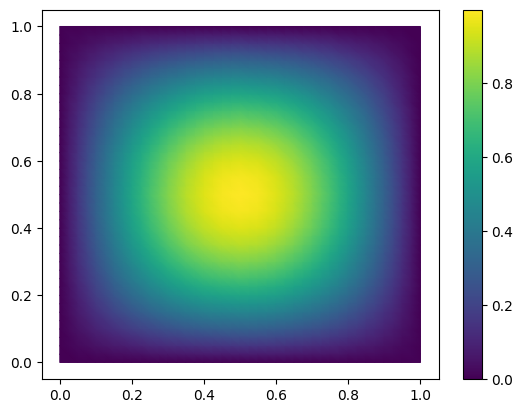

In [ ]:
# Plot the numerical solution
fig, ax = plt.subplots()
q = fdplt.tripcolor(u_h, axes=ax)
fig.colorbar(q)

### Verify the convergence properties of the method with respect to norms $L^2$ and $H^1$ for $\mathbb{P}^k$ elements, $k=1, 2$.

In [ ]:
# Define the exact solution:
u_ex = lambda x, y: sin(pi*x) * sin(pi*y)
Vaux = FunctionSpace(mesh, 'Lagrange', 3)


--------- iteration  0 ---------
Error in L2 =  0.0034489995382138163
Error in H1 =  0.17422216626788103 

--------- iteration  1 ---------
Error in L2 =  3.521001861642407e-05
Error in H1 =  0.005394146585442397 



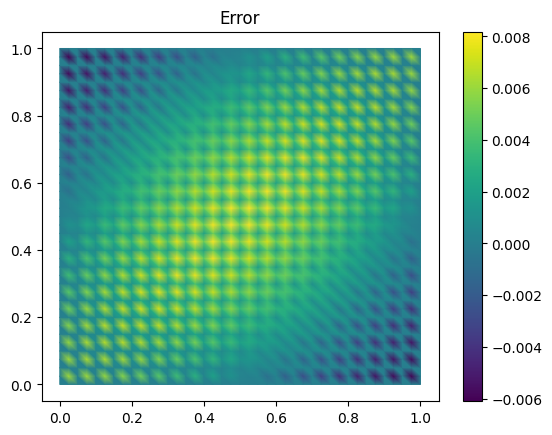

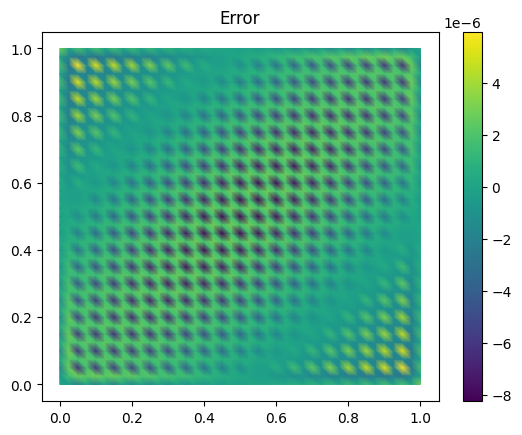

In [ ]:
# Let's eveluate the result changing polinomial degree k = 1 and 2:
k = np.array((1, 2))

for ii in range(len(k)):
  u_h, err_H1, err_L2 = solve_prob_3(int(k[ii]))

  # Print the errors:
  print('--------- iteration ', ii, '---------')
  print('Error in L2 = ', err_L2)
  print('Error in H1 = ', err_H1,'\n')

  # Plot the exact solution or the error by projecting on a higher order space
  fig, ax = plt.subplots()
  q = fdplt.tripcolor(project(u_ex(x, y) - u_h, Vaux), axes=ax)
  fig.colorbar(q)
  plt.title('Error')

## EXERCISE 4 (Exam symulation)

Consider the problem: \\

\begin{align}
    \begin{cases}
        -Δu = f \quad \quad \quad \quad \quad \quad \quad ~~~ in~Ω=(0,1)^2, \\
        ∇u· n = g_N \quad \quad \quad ~~ \quad \quad \quad \quad \quad \quad \quad \quad on~Γ_N = [(x,y)∈ℜ^2|x=0],\\
        u = 0 \quad \quad \quad \quad \quad on~\Gamma_D, \\
    \end{cases}
\end{align} \\

whose exact solution is $u = y(1-y)cos(\frac{πx}{2})$. \\

\\

(a) Write the weak formulation of the problem. \\
(b) Compute $f$ and $g_N$ from the exact solution and verify that the Dirichlet boundary condition is satisfied. \\
(c) Solve the problem with $P1$ triangular elements using Firedrake. \\
(d) Verify the order of convergence in the $H1$ norm with respect to the grid size. \\
(e) Suppose that the problem is solved with the same boundary conditions, but a different source term $\tilde{f}$. Call the corresponding solution $\tilde{u}$. Write the strong form of the problem that must be solved to determine $w := u - \tilde{u}$. \\
(f) Using the Poincaré inequality, prove that there exists a constant C > 0 such that \\

$$
∥w∥L2(Ω) ≤ C∥f − fe∥L2(Ω).
$$